# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.11.2'

In [3]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

In [12]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [13]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

In [14]:
df.shape

(151, 12)

In [17]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [18]:
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [19]:
#group by class
df.groupby(['Type 1']) ['Defense'].sum()

Type 1
Bug          685
Dragon       205
Electric     582
Fairy        121
Fighting     427
Fire         751
Ghost        135
Grass        835
Ground       690
Ice          135
Normal      1178
Poison       938
Psychic      460
Rock         990
Water       2170
Name: Defense, dtype: int64

In [21]:
df.groupby(['Type 1']) ['Stage'].count()

Type 1
Bug         12
Dragon       3
Electric     9
Fairy        2
Fighting     7
Fire        12
Ghost        3
Grass       12
Ground       8
Ice          2
Normal      22
Poison      14
Psychic      8
Rock         9
Water       28
Name: Stage, dtype: int64

In [25]:
df.groupby(['Type 1']) ['Stage'].nunique().reset_index(name='count')

,Type 1,count
0,Bug,3
1,Dragon,3
2,Electric,2
3,Fairy,2
4,Fighting,3
5,Fire,3
6,Ghost,3
7,Grass,3
8,Ground,2
9,Ice,1


In [29]:
new_df1 = df[df['Type 1']!='Fire'].reset_index()

In [30]:
new_df1

,index,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
4,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
135,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
136,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
137,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

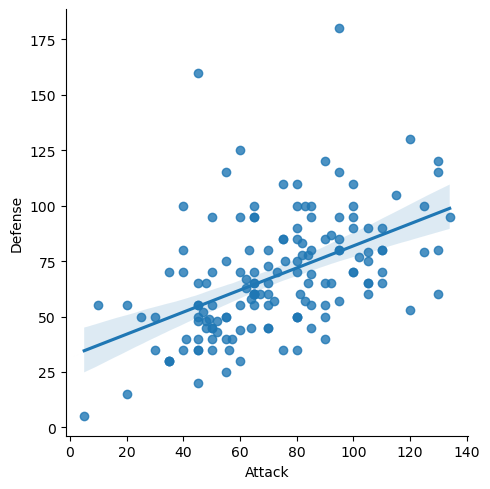

In [42]:
sns.lmplot(x= 'Attack' , y='Defense', data= df)

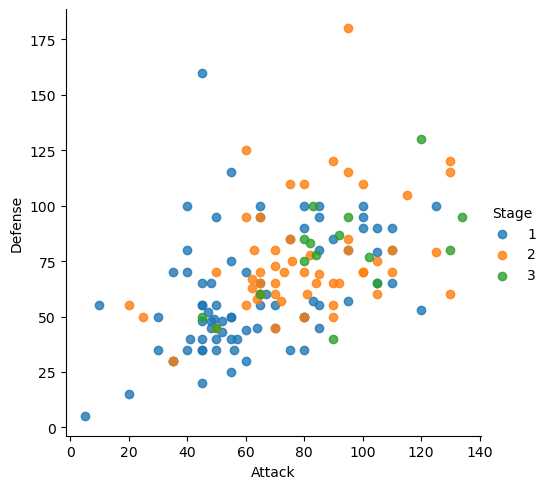

In [41]:
sns.lmplot(x= 'Attack' , y='Defense', data= df , hue= 'Stage',fit_reg = False)

In [43]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

In [46]:
new_df3 = df.drop(['Total' , 'Stage' , 'Legendary'] , axis = 1)

In [48]:
new_df3.shape

(151, 9)

<AxesSubplot:>

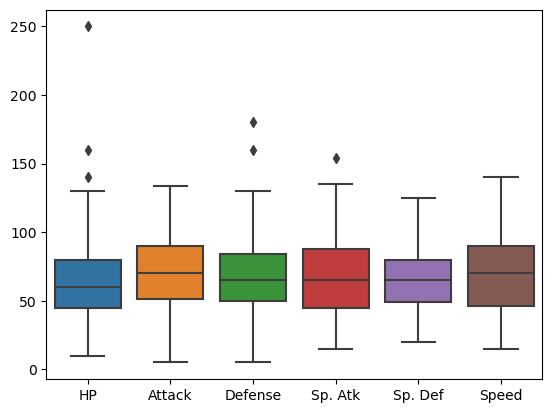

In [53]:
sns.boxplot( x=df["species"], y=df["sepal_length"], width=0.3);
plt.show()

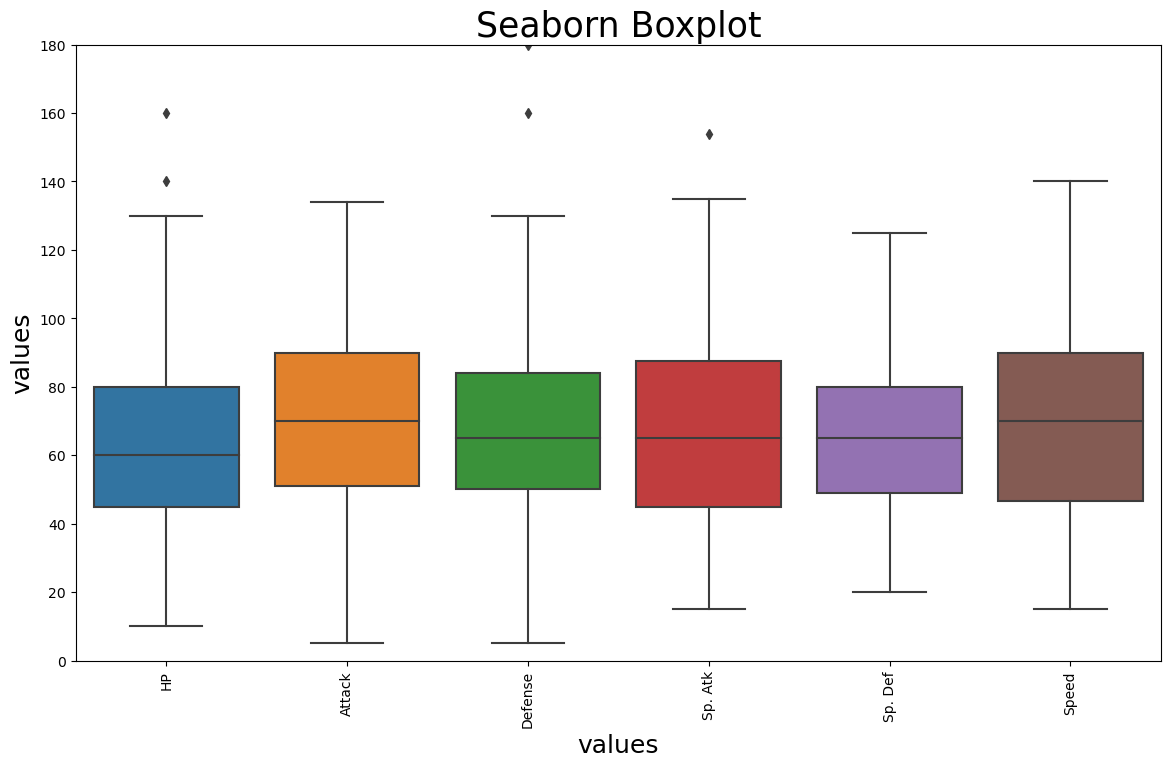

In [54]:
plt.figure(figsize=(14,8))
plt.xlabel('values',size=18)
plt.ylabel('values',size=18)
plt.title('Seaborn Boxplot' , size = 25)
plt.ylim(0,180)
plt.xticks(rotation = 90)
sns.boxplot(data = new_df3)
plt.show()

<AxesSubplot:>

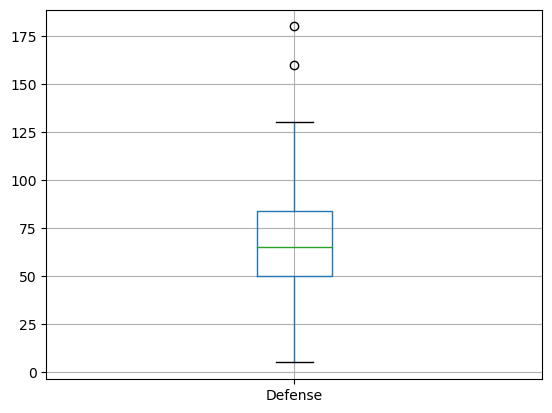

In [55]:
df.boxplot('Defense')

/Users/harshveersinghsodhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

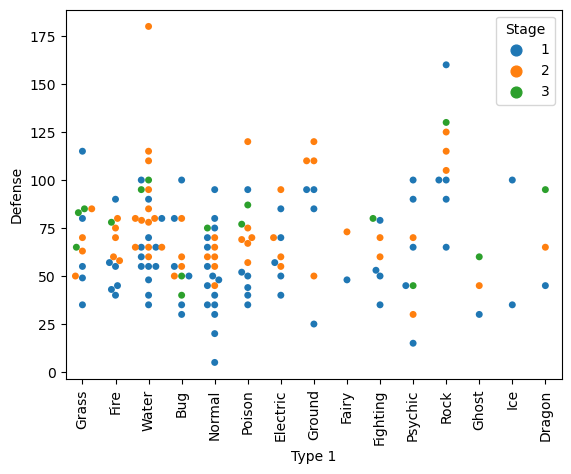

In [60]:
sns.swarmplot(x= 'Type 1' , y='Defense', data= df , hue= 'Stage')
plt.xticks(rotation = 90)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

In [ ]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")